# Overview Data
**Sumber : https://www.kaggle.com/cosminbulancea/heartdiseaseclassification**
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
dataframe = pd.read_csv('heart.csv')

In [3]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


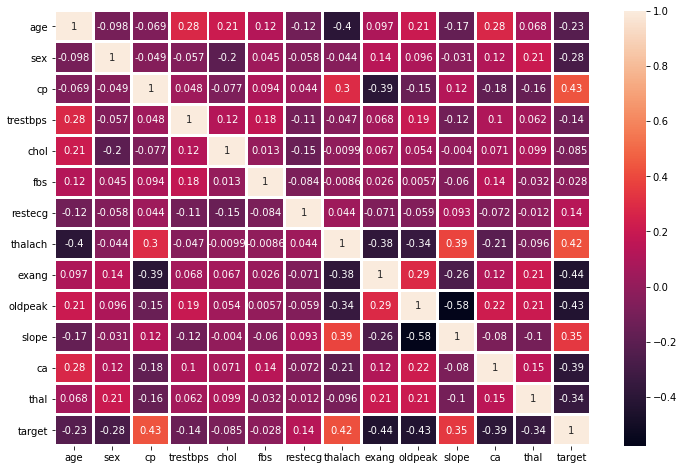

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(dataframe.corr(),annot=True,linewidths=2)
plt.show()

# Pemisahan Data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data = dataframe.drop('target',axis=1)
label = dataframe.target

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

# Machine Learning Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier(n_estimators=100)

In [10]:
model.fit(x_train,y_train)

RandomForestClassifier()

# Prediksi Data Dengan Machine Learning Model

In [11]:
prediction = model.predict(x_test)

In [12]:
model.score(x_test,y_test)

0.7213114754098361

# Evaluasi Model

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score

<AxesSubplot:>

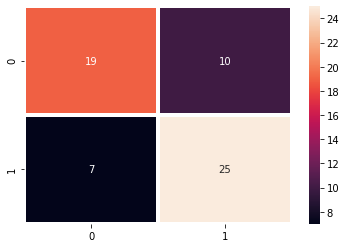

In [14]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3)

In [15]:
accuracy_score(y_test,prediction)

0.7213114754098361

# Perbaikan Model

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
params = {'n_estimators':np.arange(100,1100,100)}

In [18]:
best_model = GridSearchCV(RandomForestClassifier(),params,cv=5)

In [ ]:
best_model.fit(x_train,y_train)

In [ ]:
best_model.best_estimator_

In [ ]:
prediction = best_model.predict(x_test)

In [ ]:
accuracy_score(y_test,prediction)

In [ ]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3)

# Save Model

In [ ]:
import pickle

In [ ]:
with open('PYTN_Prakerja_Haris_Laksliosda.pkl','wb') as file:
    pickle.dump(model,file)